NÉMETH ANDRÁS - BXHYBS -1. HÁZI FELADAT

**ADATPROFILOZÁS - WEBSHOP ADATBÁZIS**

_A feladathoz én a webshop adatbázisból az ügyfél táblát választottam a házi feladatomhoz._

_A táblában szereplő tulajdonságok a következők:_

> > > > > > > _\- LOGIN(string típusú) az adott ügyfél felhasználónevét tartalmazza_
> > > > > > > 
> > > > > > > _\- EMAIL(string típusú) az adott ügyfél email címét tartalmazza_
> > > > > > > 
> > > > > > > _\-NEV(string típusú) az adott ügyfél nevét tartalmazza_
> > > > > > > 
> > > > > > > _\-SZULEV(szám típusú) az adott ügyfél születési évét tartalmazza_
> > > > > > > 
> > > > > > > _\-NEM(string típusú) az adott ügyfél nemének kezdőbetűjét tartalmazza_
> > > > > > > 
> > > > > > > _\-CIM(string típusú) az adott ügyfél címét tartalmazza_

In [ ]:
--NULL ÉRTÉKEK ELLENŐRZÉSE AZ OSZLOPOKBAN

SELECT
    SUM(CASE WHEN LOGIN IS NULL THEN 1 ELSE 0 END) AS "NULL_LOGIN",
    SUM(CASE WHEN EMAIL IS NULL THEN 1 ELSE 0 END) AS "NULL_EMAIL",
    SUM(CASE WHEN NEV IS NULL THEN 1 ELSE 0 END) AS "NULL_NEV",
    SUM(CASE WHEN SZULEV IS NULL THEN 1 ELSE 0 END) AS "SZULEV_NULL",
    SUM(CASE WHEN NEM IS NULL THEN 1 ELSE 0 END) AS "NEM_NULL",
    SUM(CASE WHEN CIM IS NULL THEN 1 ELSE 0 END) AS "CIM_NULL"
FROM UGYFEL

--MIVEL NINCS NULL ÉRTÉK, ÍGY A SZÁZALÉKOS ARÁNYT NEM VIZSGÁLTAM


In [ ]:
--EGYEDI ÉRTÉKEK VIZSGÁLATA AZ OSZLOPOKBAN

SELECT
    COUNT(DISTINCT LOGIN) AS "UNIQUE_LOGIN",
    COUNT(DISTINCT EMAIL) AS "UNIQUE_EMAIL",
    COUNT(DISTINCT NEV) AS "UNIQUE_NEV",
    COUNT(DISTINCT SZULEV) AS "UNIQUE_SZULEV",
    COUNT(DISTINCT NEM) AS "UNIQUE_NEM",
    COUNT(DISTINCT CIM) AS "UNIQUE_CIM"
FROM UGYFEL

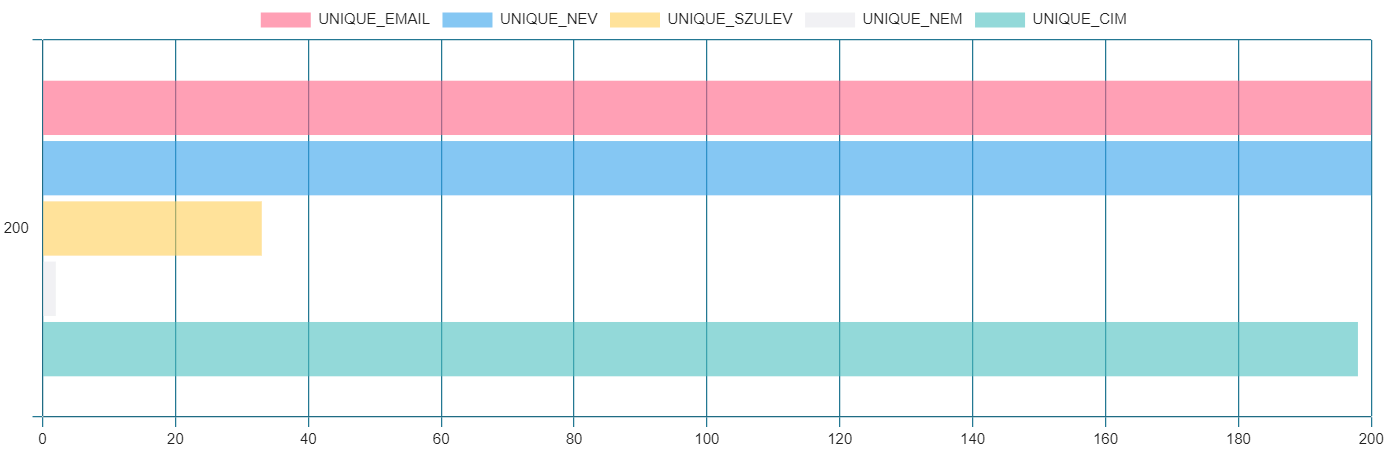

In [ ]:
--SZULEV KÜLÖNBÖZŐ MATEMATIKAI ÉRTÉKEI

SELECT 
    MIN(SZULEV) AS "MIN_SZULEV",
    MAX(SZULEV) AS "MAX_SZULEV",
    AVG(SZULEV) AS "ÁTLAG_SZULEV",
    STDEV(SZULEV) AS "SZÓRÁS_SZULEV", 
    VAR(SZULEV) AS "VARIANCIA_SZULEV"
FROM UGYFEL


In [ ]:
--A NEM TULAJDONSÁG ELOSZLÁSA

SELECT NEM, COUNT(*) AS "DARABSZÁM"
FROM UGYFEL
GROUP BY NEM

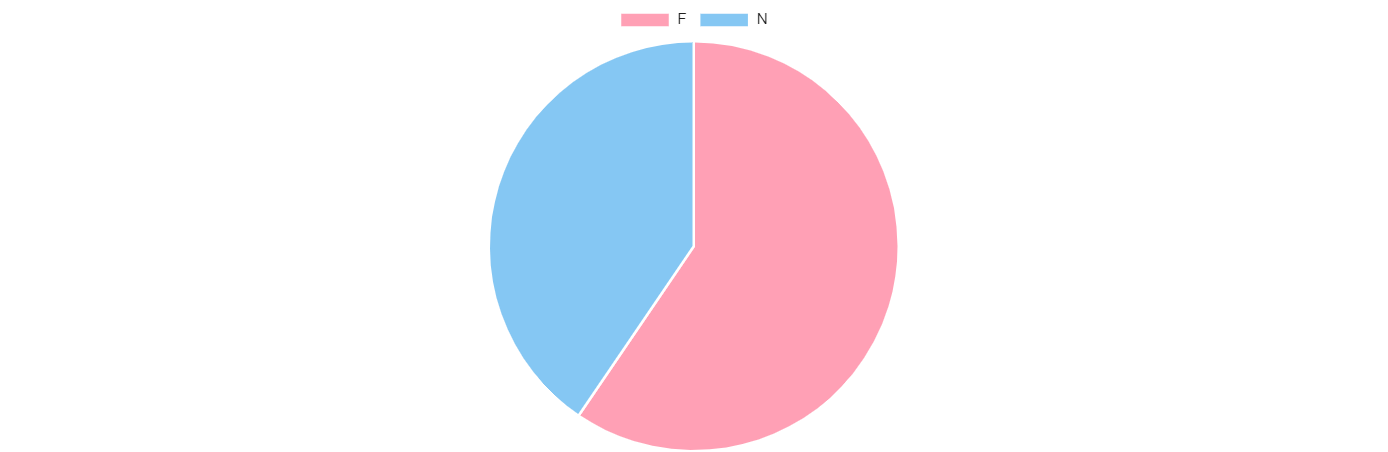

In [ ]:
--ÁLTALÁNOS INFORMÁCIÓK A TÁBLÁRÓL

SELECT COLUMN_NAME, DATA_TYPE, CHARACTER_MAXIMUM_LENGTH
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'ugyfel'

In [ ]:
--ENTITÁSOK SZÁMA

SELECT COUNT(*) AS "TOTAL" FROM UGYFEL

In [ ]:
--CÍMEK MAXIMUM, MINIMUM ÉS ÁTLAGOS HOSSZA

SELECT 
    MIN(LEN(CIM)) AS "MIN_CIM_HOSSZ", 
    MAX(LEN(CIM)) AS "MAX_CIM_HOSSZ", 
    AVG(LEN(CIM)) AS "ATLAG_CIM_HOSSZ" 
FROM UGYFEL

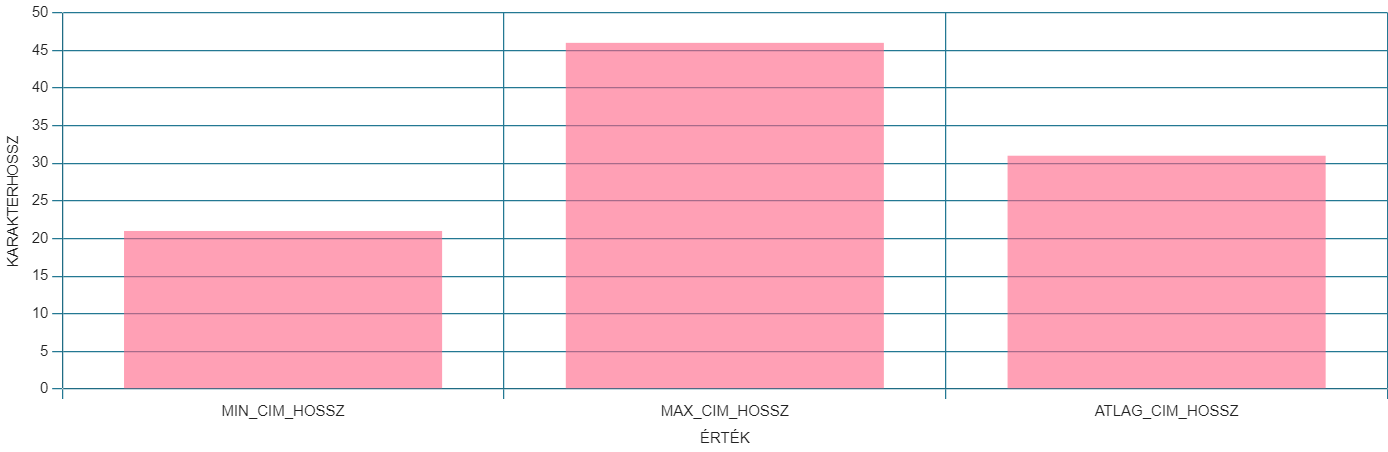

In [ ]:
--ESETLEGES HIBÁS EMAIL-EK KISZŰRÉSE

SELECT EMAIL 
FROM UGYFEL 
WHERE EMAIL NOT LIKE '%@%';



In [ ]:
--KIUGRÓ/HIBÁS SZÜLETÉSI ÉVEK

SELECT SZULEV 
FROM UGYFEL 
WHERE SZULEV < 1900 OR SZULEV > YEAR(GETDATE());

In [ ]:
--TOVÁBBI SZÖVEGES MEZŐK HOSSZAINAK ADATAI

SELECT 
    MIN(LEN(LOGIN)) AS "MIN_LOGIN_LENGTH", 
    MAX(LEN(LOGIN)) AS "MAX_LOGIN_LENGTH", 
    AVG(LEN(LOGIN)) AS "AVG_LOGIN_LENGTH", 
    MIN(LEN(EMAIL)) AS "MIN_EMAIL_LENGTH", 
    MAX(LEN(EMAIL)) AS "MAX_EMAIL_LENGTH", 
    AVG(LEN(EMAIL)) AS "AVG_EMAIL_LENGTH", 
    MIN(LEN(NEV)) AS "MIN_NEV_LENGTH", 
    MAX(LEN(NEV)) AS "MAX_NEV_LENGTH", 
    AVG(LEN(NEV)) AS "AVG_NEV_LENGTH" 
FROM UGYFEL;

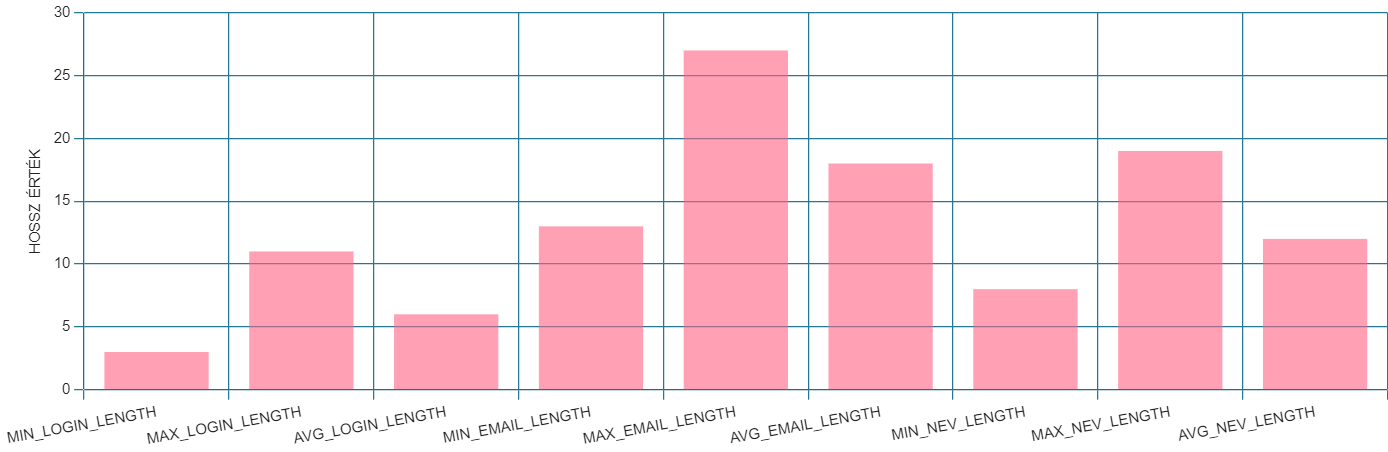

In [ ]:
-- TOP 3 KERESZTNÉV DARAB SZERINT

SELECT TOP 3
    RIGHT(NEV, CHARINDEX(' ', REVERSE(NEV)) - 1) AS "KERESZTNÉV", 
    COUNT(*) AS "DARABSZÁM" 
FROM UGYFEL 
GROUP BY RIGHT(NEV, CHARINDEX(' ', REVERSE(NEV)) - 1) 
ORDER BY COUNT(*) DESC 

--SAJNOS A KÉP NEM INTERAKTÍV, ÍGY NEM LÁTSZANAK A DARABSZÁMOK A KURZOR MOZGATÁSÁVAL

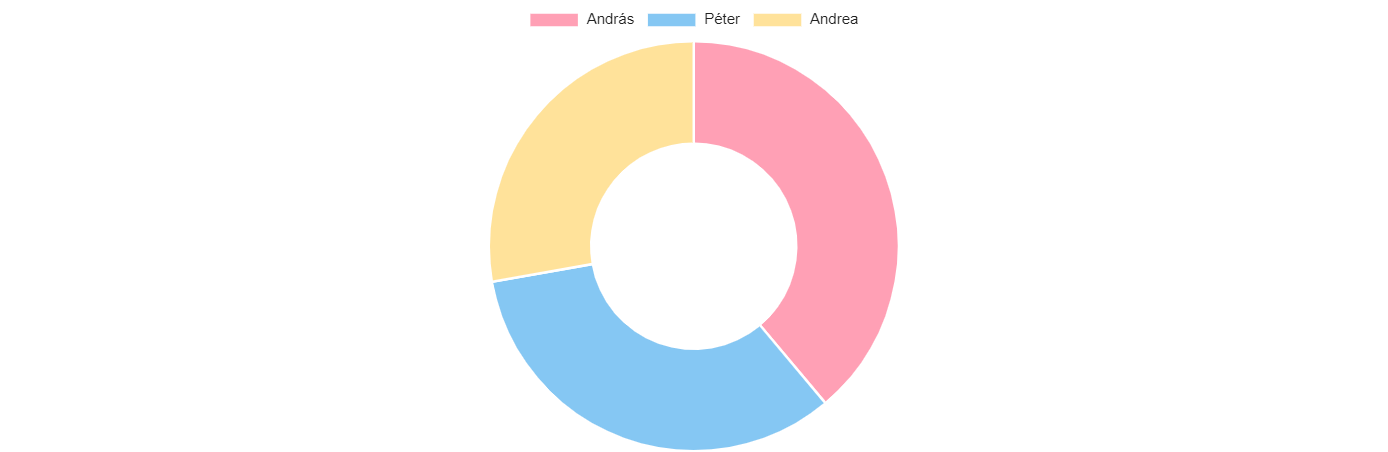